In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
apple_data = pd.read_csv("AppleStore.csv")
google_data = pd.read_csv("googleplaystore.csv")

google_data["Price"] = google_data["Price"].str.replace("$","")
google_data["Price"] = google_data["Price"].apply(pd.to_numeric, errors='coerce')
google_data["Installs"] = google_data["Installs"].str.replace("+","")
google_data["Installs"] = google_data["Installs"].str.replace(",","")
google_data["Installs"] = google_data["Installs"].apply(pd.to_numeric, errors='coerce')
google_data["Size"] =google_data["Size"].str.replace("M","")
google_data["Size"] = google_data["Size"].apply(pd.to_numeric,errors='coerce')
# google_data = google_data[google_data["Price"]<10]
#set price as numbers

In [8]:
google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


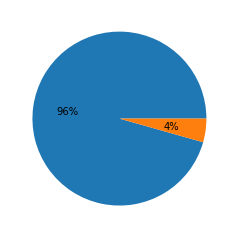

In [18]:
df = google_data.sort_values("Installs",ascending=False).head(8000)
plt.pie(df.groupby("Type")["App"].count(),autopct='%1.0f%%');

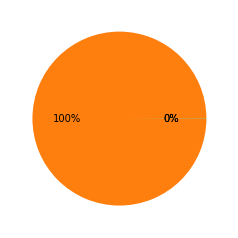

In [73]:
plt.pie(google_data.groupby("Type")["Installs"].sum(),autopct='%1.0f%%');

In [77]:
#divide by free and paid
free_apps = google_data[google_data["Price"]==0]
paid_apps = google_data[google_data["Price"]>0]

In [ ]:
#take top selling apps(free)
free_apps = free_apps.sort_values("Installs",ascending = False).head(100)

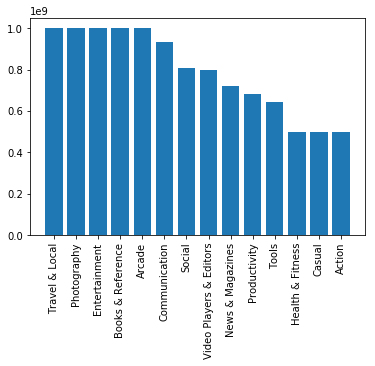

In [85]:
#free app: category vs install count
df = free_apps.groupby("Genres")["Installs"].mean().sort_values(ascending = False).head(20)
plt.bar(df.index.values,df)
plt.xticks(rotation = 90);

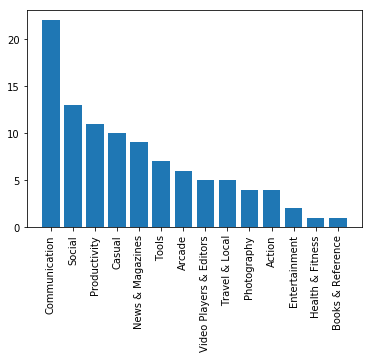

In [86]:
#comparison based on count of apps
df = free_apps.groupby("Genres")["Installs"].count().sort_values(ascending = False).head(20)
plt.bar(df.index.values,df)
plt.xticks(rotation = 90);

In [87]:
#scatter plot size vs installs
# plt.scatter(free_apps["Size"],free_apps["Installs"])
free_apps["Size"]

336      NaN
3909     NaN
338      NaN
4098     NaN
152      NaN
4096     NaN
1654    76.0
2545     NaN
2808     NaN
382      NaN
3765    13.0
2544     NaN
3736    13.0
3928     NaN
3896    76.0
335      NaN
1700    76.0
4150     NaN
5395     NaN
340      NaN
411      NaN
4144     NaN
341      NaN
4104     NaN
9844    13.0
4170     NaN
2554     NaN
391      NaN
3904     NaN
3665     NaN
        ... 
1966    74.0
3574     NaN
3265     NaN
3888     NaN
1842    74.0
1759    62.0
3562     NaN
1920    62.0
3703     NaN
4147     NaN
2550     NaN
3235     NaN
3907     NaN
4222    11.0
3767     NaN
3739     NaN
1705    74.0
1869    74.0
3796     NaN
1885    24.0
3755     NaN
1886    62.0
2546     NaN
3819     NaN
3255    17.0
3533     NaN
1908     NaN
431      NaN
5596    70.0
4365     NaN
Name: Size, Length: 100, dtype: float64

In [88]:
#maybe the size of the app can be relative to number of installs? might be used as indication of difficulty of creation of the app
free_size_genre_installs = free_apps.groupby(["Size","Genres"])["Installs"].mean()
free_size_genre_installs_count = free_apps.groupby(["Size","Genres"])["Installs"].count()
free_size_genre = pd.DataFrame({"Installs": free_size_genre_installs,"Count":free_size_genre_installs_count})
free_size_genre.sort_values("Installs",ascending=False)
# plt.scatter(free_apps["Size"],free_apps["Installs"])

,,Installs,Count
Size,Genres,,
13.0,News & Magazines,1.000000e+09,4
76.0,Arcade,1.000000e+09,6
11.0,Communication,5.000000e+08,1
17.0,Tools,5.000000e+08,1
24.0,Casual,5.000000e+08,2
61.0,Productivity,5.000000e+08,2
62.0,Action,5.000000e+08,4
70.0,Health & Fitness,5.000000e+08,1
74.0,Casual,5.000000e+08,5


In [89]:
paid_apps["Profit"] = paid_apps["Price"]*paid_apps["Installs"]

C:\Users\tivme\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [90]:
#top sellers in paid apps
paid_apps = paid_apps.sort_values("Profit",ascending=False).head(100)

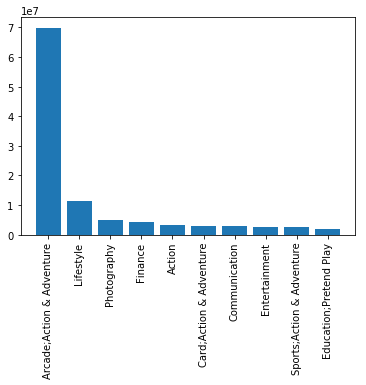

In [91]:
#comparison based on average profit
df = paid_apps.groupby("Genres")["Profit"].mean().sort_values(ascending=False).head(10)
plt.bar(df.index.values, df)
plt.xticks(rotation = 90);

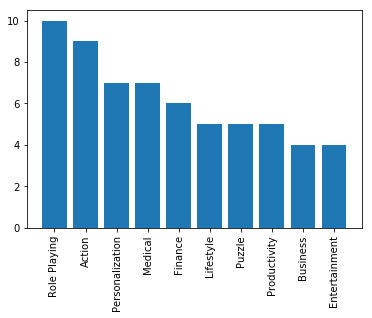

In [92]:
#comparison based on count
df = paid_apps.groupby("Genres")["Profit"].count().sort_values(ascending=False).head(10)
plt.bar(df.index.values, df)
plt.xticks(rotation = 90);

In [93]:
df1 = paid_apps.groupby(["Size","Genres"])["Profit"].mean()
df2 = paid_apps.groupby(["Size","Genres"])["Profit"].count()
df = pd.DataFrame({"Profit":df1,"Count":df2})
df.sort_values("Count",ascending=False)

,,Profit,Count
Size,Genres,,
25.0,Medical,2499000.0,3
48.0,Photography,5990000.0,3
6.8,Business,499000.0,2
12.0,Medical,900000.0,2
14.0,Personalization,2490000.0,2
39.0,Business,499000.0,2
42.0,Medical,599500.0,2
26.0,Personalization,990000.0,2
24.0,Education;Pretend Play,1995000.0,2


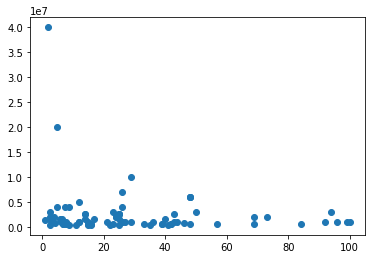

In [94]:
plt.scatter(paid_apps["Size"],paid_apps["Profit"])

In [95]:
google_data.groupby("Size")["App"].count()

Size
1.0       7
1.1      32
1.2      41
1.3      35
1.4      37
1.5      48
1.6      39
1.7      40
1.8      50
1.9      32
2.0      51
2.1      40
2.2      45
2.3      68
2.4      48
2.5      68
2.6      50
2.7      53
2.8      65
2.9      69
3.0      61
3.1      56
3.2      55
3.3      77
3.4      65
3.5      51
3.6      57
3.7      63
3.8      62
3.9      62
         ..
71.0     14
72.0     19
73.0     15
74.0     20
75.0     13
76.0     27
77.0     13
78.0     23
79.0     11
80.0     13
81.0     11
82.0     21
83.0     15
84.0      9
85.0     17
86.0      8
87.0     13
88.0     14
89.0      9
90.0      6
91.0     22
92.0     15
93.0     16
94.0     17
95.0     18
96.0     26
97.0     20
98.0     16
99.0     39
100.0    16
Name: App, Length: 181, dtype: int64

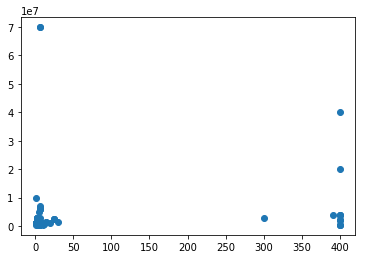

In [96]:
plt.scatter(paid_apps["Price"],paid_apps["Profit"])